## Introducation
The dataset we use for the assignment is from [Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease), which can be used to preict the chronic kidney disease. 
The data has 24 features, we import this data as two parts. The first part is X, which is the explanatory variable. The another part is called y, which is response variable, i.e. the status of chronic kidney disease.  

In [80]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 
  
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets 
X
print(X)

y


      age    bp     sg   al   su     rbc        pc         pcc          ba  \
0    48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1     7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2    62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3    48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4    51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
..    ...   ...    ...  ...  ...     ...       ...         ...         ...   
395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent  notpresent   
398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   
399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent  notpresent   

       bgr  ...  hemo   pcv    wbcc  rbcc  htn   dm  cad  appet

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


In [81]:
yclass = set(y["class"])
print(yclass)

{'notckd', 'ckd\t', 'ckd'}


1. Classification Problem Identification:

- Looking at the introduction of the predict variable y, it is catogorical and only assigned 2 types of observations: people who have chronical desease and people who does not have chronical desease. But look at the data, there is one addiction type which is called 'ckd\t', which could understanded as wrong input. In this case we convert group with this term to people who have chronical desease.

- The column of diabetes mellitus (dm) has same input error of "'\tno'", we also use the same trick to convert this into "no".

- The datatype of includes both catogorical data and nominal data, we need to convert the object into categorical data. Also,there is outliers in this data.

In [82]:
for i in y["class"]:
    if i == "ckd\t":
        y["class"].replace("ckd\t", "ckd", inplace=True)


/var/folders/8d/rl260sm16jzgyscznl23d0z80000gn/T/ipykernel_57231/1546460364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"].replace("ckd\t", "ckd", inplace=True)


In [83]:
yclass = set(y["class"])
yclass

{'ckd', 'notckd'}

In [84]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

In [85]:
obj_columns =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
num_categories = X[obj_columns].nunique()
num_categories

rbc      2
pc       2
pcc      2
ba       2
htn      2
dm       3
cad      2
appet    2
pe       2
ane      2
dtype: int64

In [86]:
dmclass = set(X["dm"])
print(dmclass)
#we see the dm has same input error of "'\tno'"

{'no', 'yes', nan, '\tno'}


In [87]:
for i in X["dm"]:
    if i == "\tno":
        X["dm"].replace("\tno", "no", inplace=True)

/var/folders/8d/rl260sm16jzgyscznl23d0z80000gn/T/ipykernel_57231/2459818985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["dm"].replace("\tno", "no", inplace=True)


In [88]:
dmclass = set(X["dm"])
print(dmclass)

{'no', 'yes', nan}


2. Variable Transformation:

- We need to do the variable tranformation, which convert the catogorical data into 0 and 1. After that, we scale all numerical values to uniform the magnitude of each variable for better estimation. 

In [89]:
## variable tranformation
import pandas as pd
obj_columns =["rbc", "pc", "pcc", "ba", "htn", "dm", "cad", "appet", "pe", "ane"]
columns_to_convert_1 = ["pcc", "ba"]
columns_to_convert_2 = ["rbc", "pc"]
columns_to_convert_3 = ["htn", "dm", "cad", "pe", "ane"]
columns_to_convert_4 = ["appet"]

X_reg = X.copy()

for col in columns_to_convert_1:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["notpresent", "present"], 
        ordered=True
    )

for col in columns_to_convert_2:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["abnormal", "normal"], 
        ordered=True
    )

for col in columns_to_convert_3:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["no","yes"], 
        ordered=True
    )

for col in columns_to_convert_4:
    X_reg[col] = pd.Categorical(
        X_reg[col], 
        categories=["poor","good"], 
        ordered=True
    )


for col in obj_columns:
    X_reg[col] = X_reg[col].astype('category').cat.codes
X_reg.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc         int8
pc          int8
pcc         int8
ba          int8
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn         int8
dm          int8
cad         int8
appet       int8
pe          int8
ane         int8
dtype: object

In [90]:
X_reg.head() #check the work

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,-1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,-1,1,0,0,NaN,...,11.3,38.0,6000.0,NaN,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,NaN,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,1,0,0


In [91]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

- Scale the numerical values:

In [92]:
numerical=X_reg.select_dtypes(include='float64').columns
numerical_data = X_reg[numerical]
scale = StandardScaler()
X_reg[numerical] = scale.fit_transform(numerical_data)
X_reg.head()


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,-0.203139,0.258373,0.454071,-0.012548,-0.410106,-1,1,0,0,-0.341498,...,0.988022,0.569881,-0.206202,0.481295,1,1,0,1,0,0
1,-2.594124,-1.936857,0.454071,2.208413,-0.410106,-1,1,0,0,NaN,...,-0.421688,-0.098536,-0.818559,NaN,0,0,0,1,0,0
2,0.613295,0.258373,-1.297699,0.727772,2.323069,1,1,0,0,3.473064,...,-1.006202,-0.878356,-0.308261,NaN,0,1,0,0,0,1
3,-0.203139,-0.473370,-2.173584,2.208413,-0.410106,1,0,1,0,-0.392022,...,-0.456071,-0.766953,-0.580420,-0.788961,1,0,0,0,1,1
4,-0.028189,0.258373,-1.297699,0.727772,-0.410106,1,1,0,0,-0.530963,...,-0.318538,-0.432744,-0.376301,-0.104977,0,0,0,1,0,0


3. Dataset Overview: 

In [93]:
X.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [94]:
X.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
dtype: object

- Other than the introduction we introduced at the beginning. The dataset suppose to caontains 400 observations for each variable. 
- The explanatory variables include: age, blood pressure(bp), specific gravity(sg), albumin(al), sugar(su), red blod cells(rbc), pus cell(pc), pus cell clumps(pcc), bacteria(ba), blood glucose random(bgr), blood urea(bu), serum creatinine(sc), sodium(sod), potassium(pot), hemoglobin(hemo), packed cell volume(pcv), white blood cell count(wc), red blood cell count(rc), hypertension(htn), diabetes mellitus(dm), coronary artery disease(cad), appetite(appet), pedal edema(pe), anemia(ane), and class. 
- From the summary of the dataset, however, we can see thare are many missing values sine the counts for each column are not precisely 400, this situation will be fixed for later operation. 
- The dataset had two types, *float64 (numerical)* and *object (categorical)*. After the transformation we did in **Part 2**, the types become *float64* and *int8* respectively. In addition, the distributions of the dataset is analyzed as follows. 

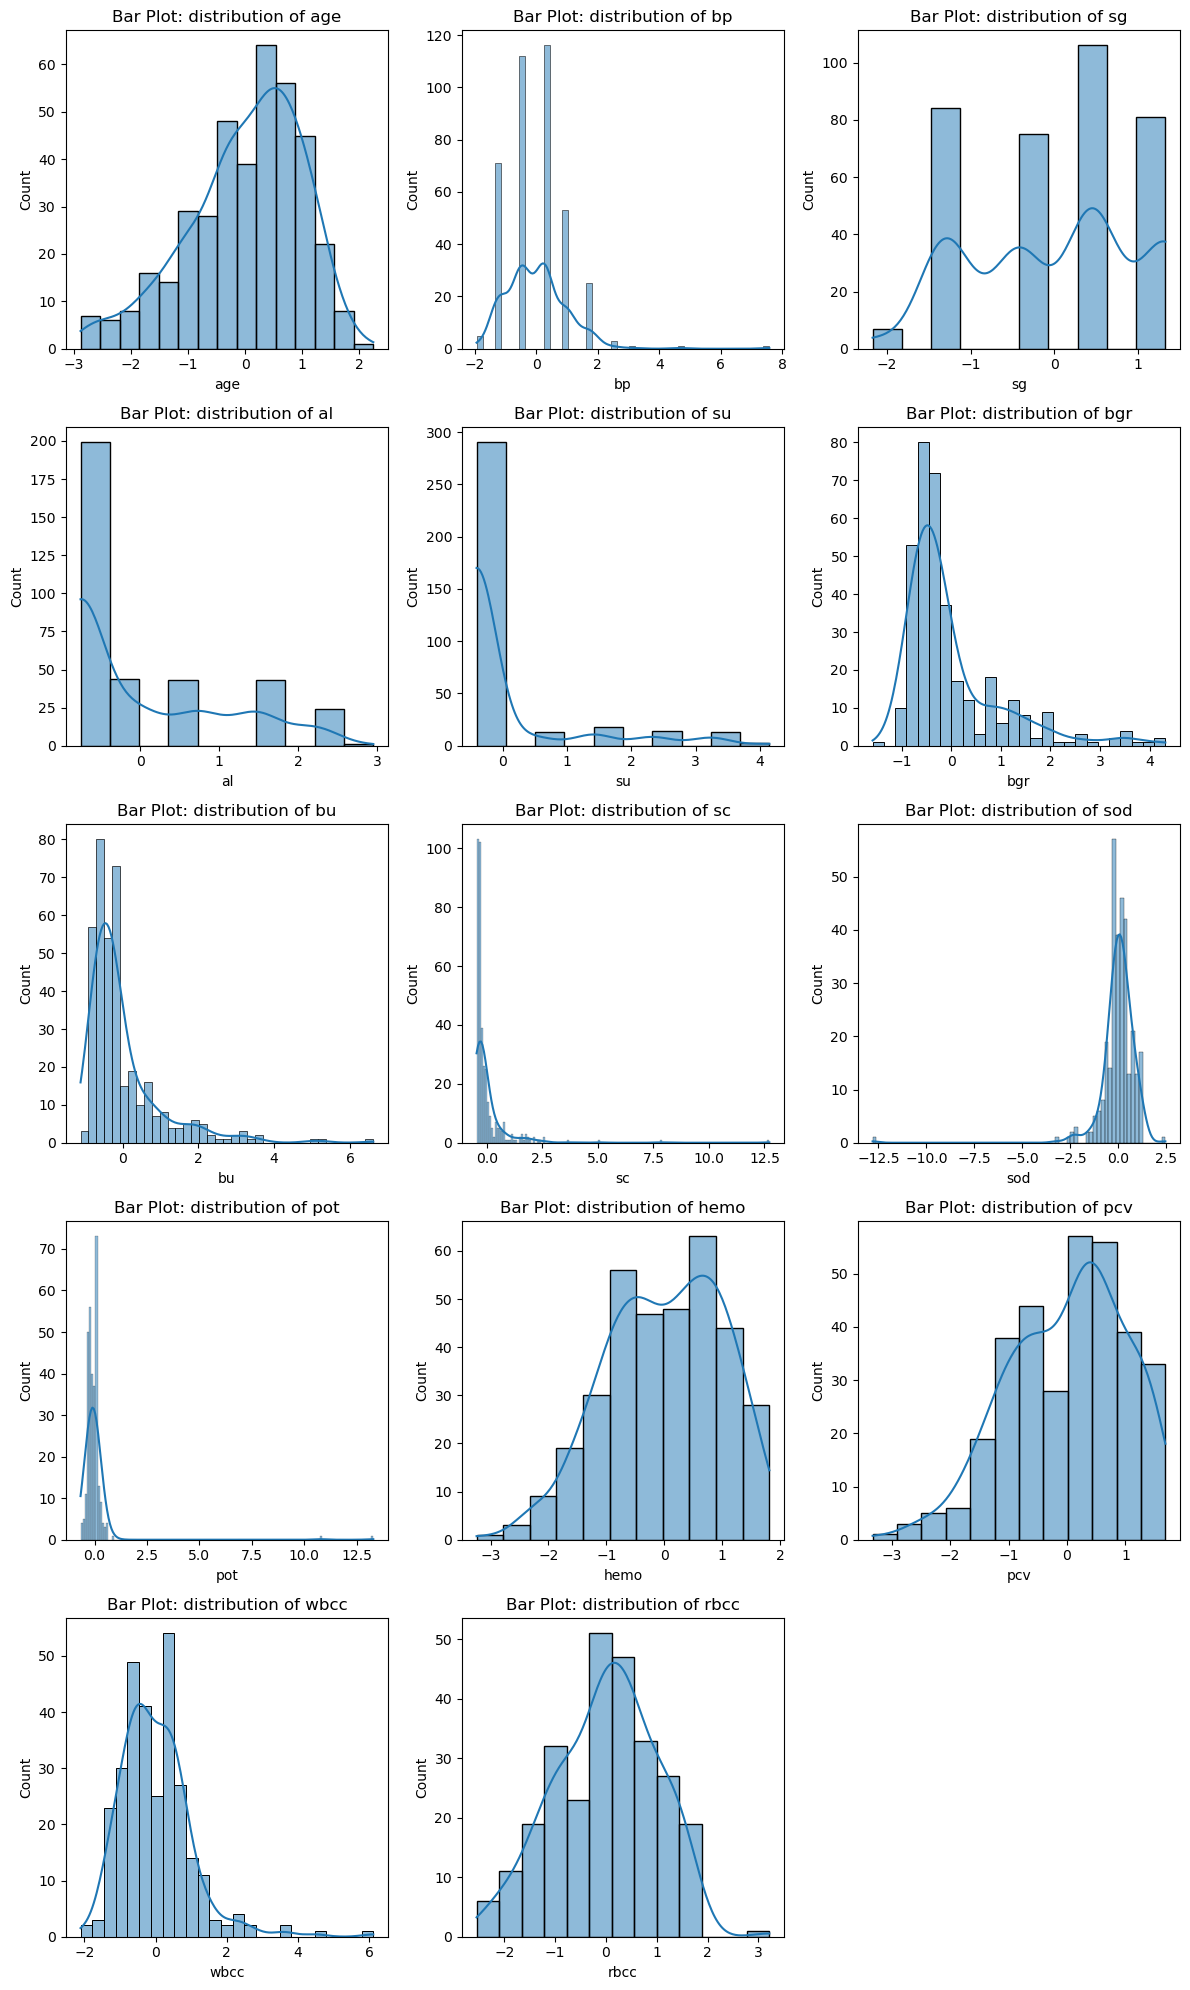

In [95]:
n_rows = 5
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes_flat = axes.flatten()

for i, term in enumerate(numerical):
    sns.histplot(
        data=X_reg,
        x=term,
        kde=True,
        cbar="blues",
        ax=axes_flat[i] 
    )
    axes_flat[i].set_xlabel(term)
    axes_flat[i].set_ylabel("Count")
    axes_flat[i].set_title("Bar Plot: distribution of " + term)

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

4. Association Between Variables
- We use two methods to analyze the association between these variables. Firstly, we use heat map to analyze the association between all numerical datas. After that, we use histogram to analyze the association between all categorical variables. 

<Axes: >

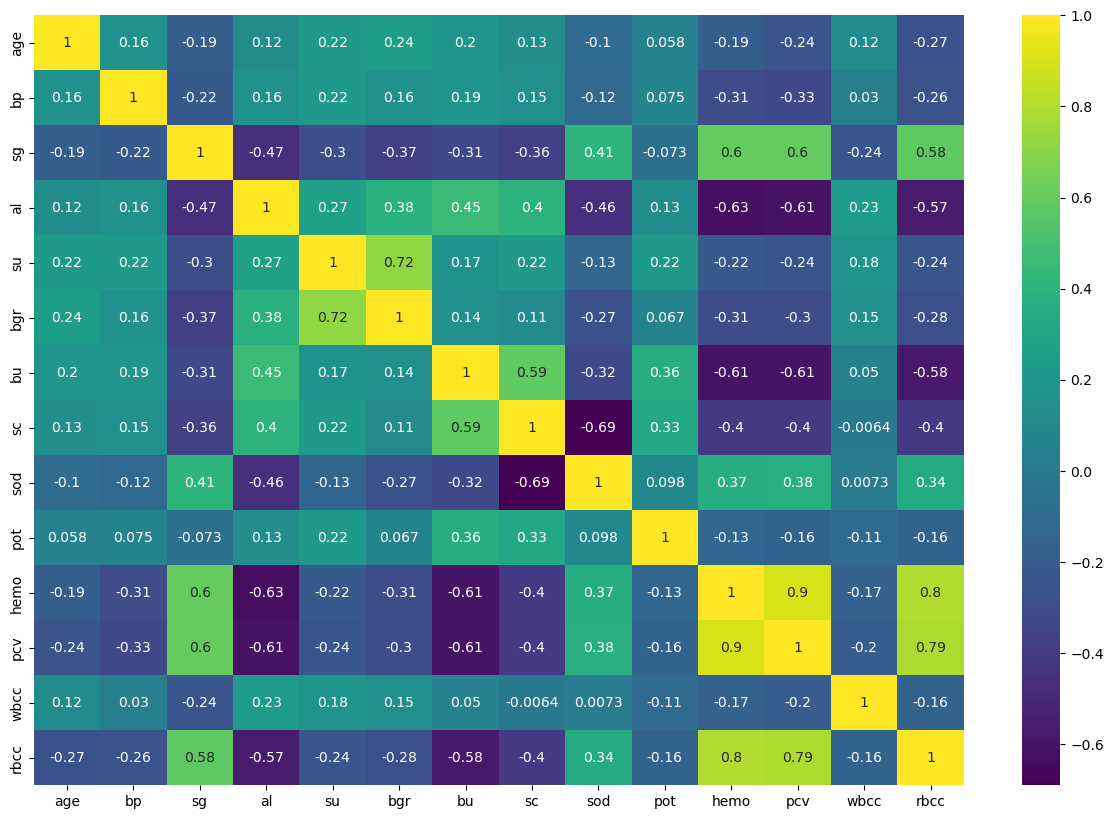

In [96]:
plt.figure(figsize=(15, 10))
sns.heatmap(X_reg[numerical].corr(), annot=True,cmap='viridis')

- According to the heatmap, lighter colour represent a higher association and vise versa. For example, pcv, hemo, and rbcc has high association with each other. However, the heatmap shows that all numerical variables have a less association overall because most of them are under 0.5. 

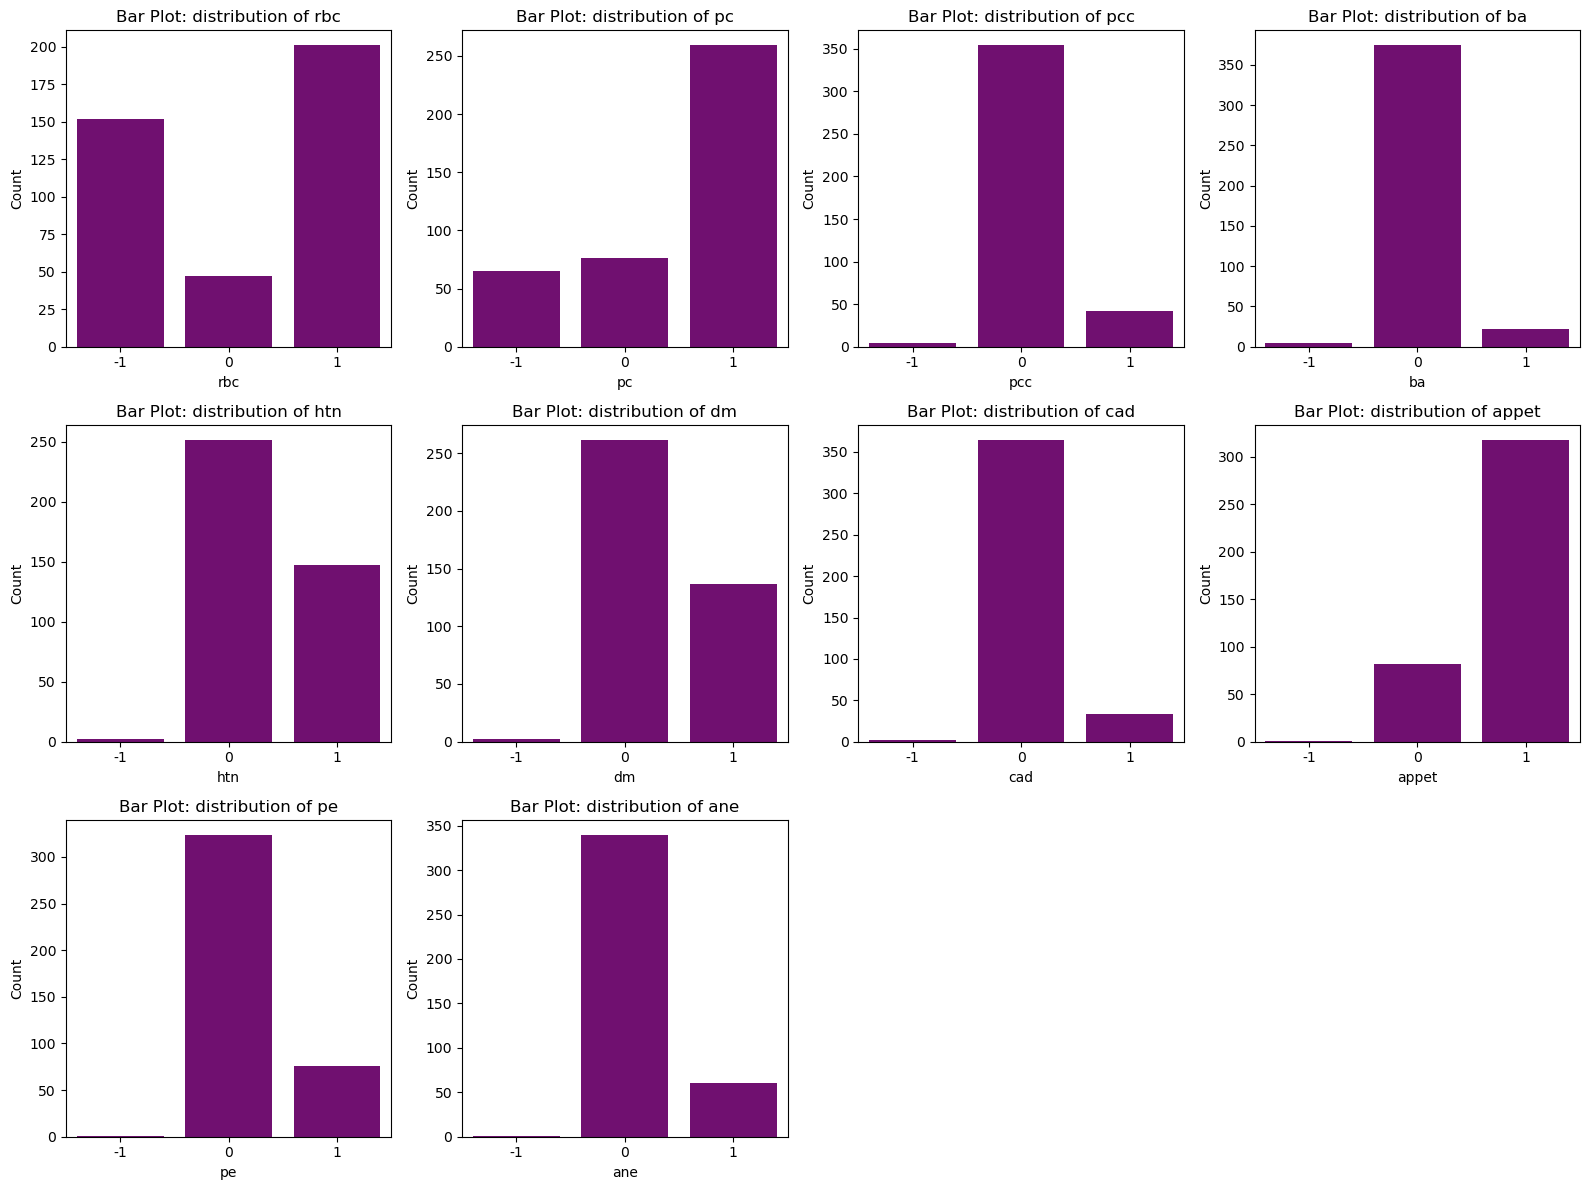

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical=X_reg.select_dtypes(include='int8').columns

n_rows = 3
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes_flat = axes.flatten()

for i, term in enumerate(categorical):
    sns.countplot(
        data=X_reg,
        x=term,
        color="purple",
        ax=axes_flat[i] 
    )
    axes_flat[i].set_xlabel(term)
    axes_flat[i].set_ylabel("Count")
    axes_flat[i].set_title("Bar Plot: distribution of " + term)

for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes_flat[j])

plt.tight_layout()

plt.show()


term- From  histograms, for implication of these categorical variables for feature selection, if the -1 term appears more then 50 times, we could conclude that there are too many NA in this varibale, we need to drop this term during feature selection, such as "rbc" and "pc".  The histogram of rbc has many missing values so it may not be significant for feature selection. 

5. Missing Value Analysis and Handling

In [98]:
X.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64

- From above, we can see there are missing values everywhere. We decided to remove variables that have more than 50 missing values because too many missing values result in an inaccurate analysis. 

In [99]:
m_value = X_reg.isna().sum()

m_value_df = pd.DataFrame(m_value, columns=["missing values"])
bigm = m_value_df[m_value_df["missing values"]>50].index
bigm

Index(['sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc'], dtype='object')

In [100]:
from sklearn.impute import KNNImputer

X_new = X_reg.drop(columns=bigm)
imputer = KNNImputer(n_neighbors=5)
X_new = pd.DataFrame(imputer.fit_transform(X_new), columns=X_new.columns)
X_new.isna().sum()


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

6. Outlier Analysis:

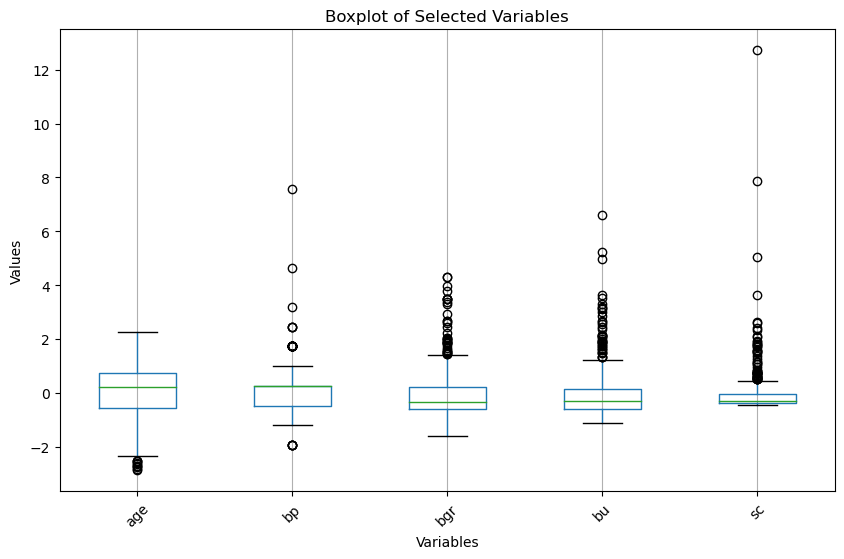

In [101]:
new_columns =['age', 'bp', 'bgr', 'bu', 'sc']

boxplot_data = X_new[new_columns]

plt.figure(figsize=(10, 6)) 
boxplot_data.boxplot()
plt.title('Boxplot of Selected Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.show()

Looking at the box plot for all the remaining numerical variables, we see that all variables have outliers, but "bp" and "sc" variables have outlier relatively large outlier, especially for "sc", so we want to delelte the entire row for these outlier with value greater thenm 6. In this case our data would give us better estimation.

In [102]:
X_new_dummy = pd.DataFrame(X_new, columns=['age', 'bp', 'sg', 'al', 'su']) 
X_new_dummy = X_new_dummy[(X_new_dummy <= 6).all(axis=1)] 
X_new_dummy.describe

<bound method NDFrame.describe of           age        bp        sg        al        su
0   -0.203139  0.258373  0.454071 -0.012548 -0.410106
1   -2.594124 -1.936857  0.454071  2.208413 -0.410106
2    0.613295  0.258373 -1.297699  0.727772  2.323069
3   -0.203139 -0.473370 -2.173584  2.208413 -0.410106
4   -0.028189  0.258373 -1.297699  0.727772 -0.410106
..        ...       ...       ...       ...       ...
395  0.205078  0.258373  0.454071 -0.752868 -0.410106
396 -0.553039 -0.473370  1.329955 -0.752868 -0.410106
397 -2.302541  0.258373  0.454071 -0.752868 -0.410106
398 -2.010957 -1.205114  1.329955 -0.752868 -0.410106
399  0.380028  0.258373  1.329955 -0.752868 -0.410106

[399 rows x 5 columns]>

Here we can clearly check the outlier has been removed. we also so the same index change in y

In [103]:
outlier_indices = X_new.index[X_new.apply(lambda x: (x > 6).any(), axis=1)].tolist() 
outlier_indices
X_new_dummy_dropped = X_new.drop(index=outlier_indices)
y_new=y.drop(index=outlier_indices)

In [104]:
y_new['class'] = y_new["class"].astype('category').cat.codes
y_new

,class
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


7. Sub-group Analysis

In [105]:
##K-means
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics.cluster import rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm  # Import colormap directly from matplotlib.cm


In [106]:
y['class'] = y["class"].astype('category').cat.codes

km1 = KMeans(n_clusters=2, n_init=20, random_state=0)
km1.fit(X_new_dummy_dropped)
km1.labels_

/var/folders/8d/rl260sm16jzgyscznl23d0z80000gn/T/ipykernel_57231/1292506993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y["class"].astype('category').cat.codes


array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

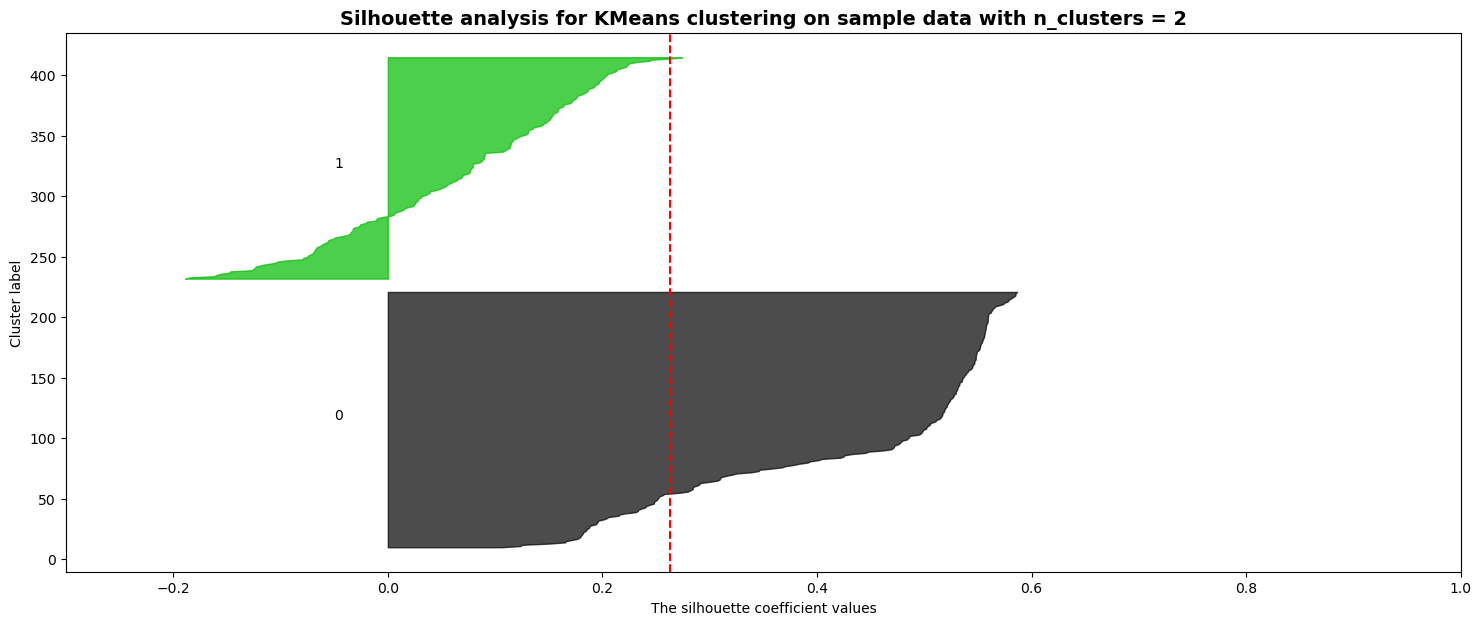

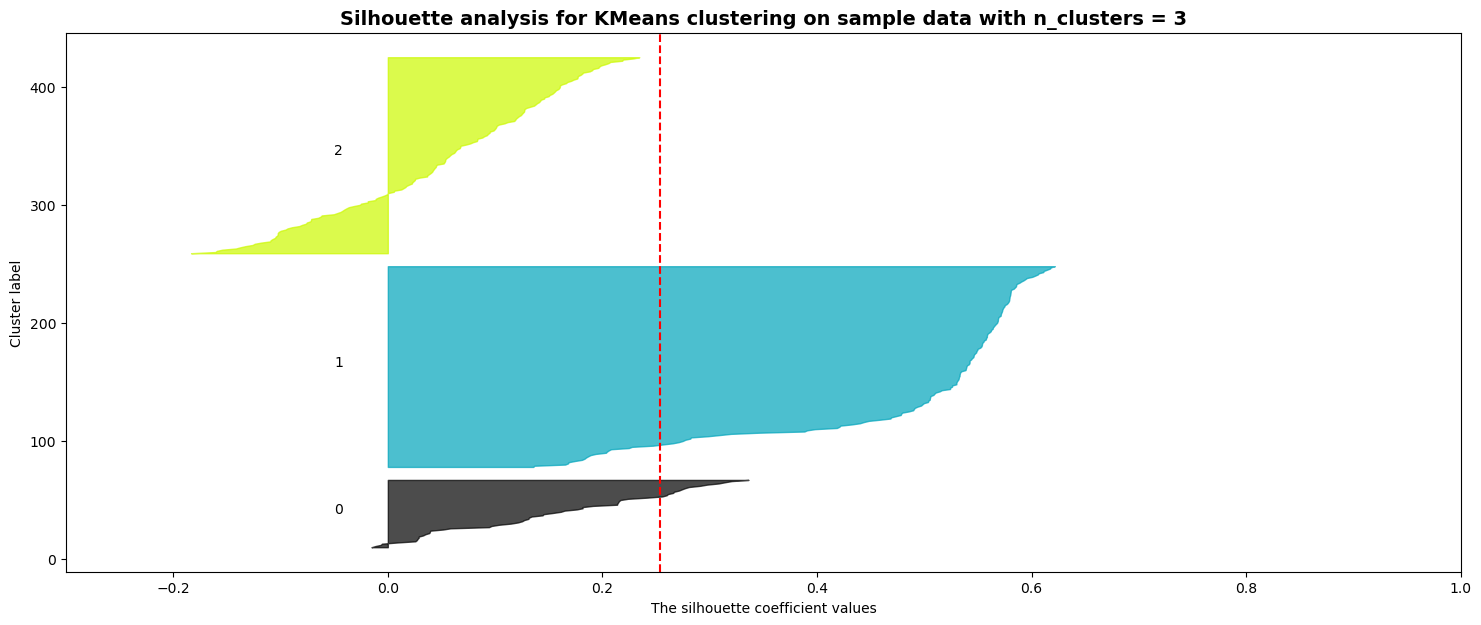

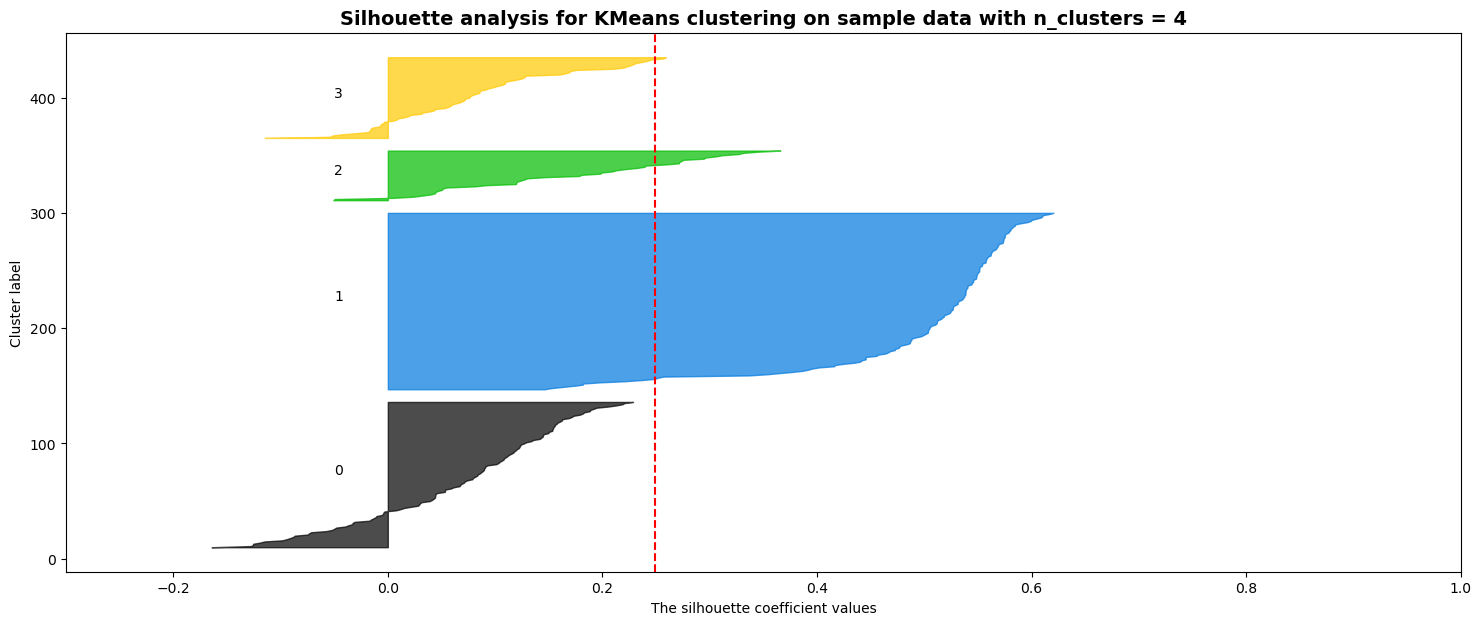

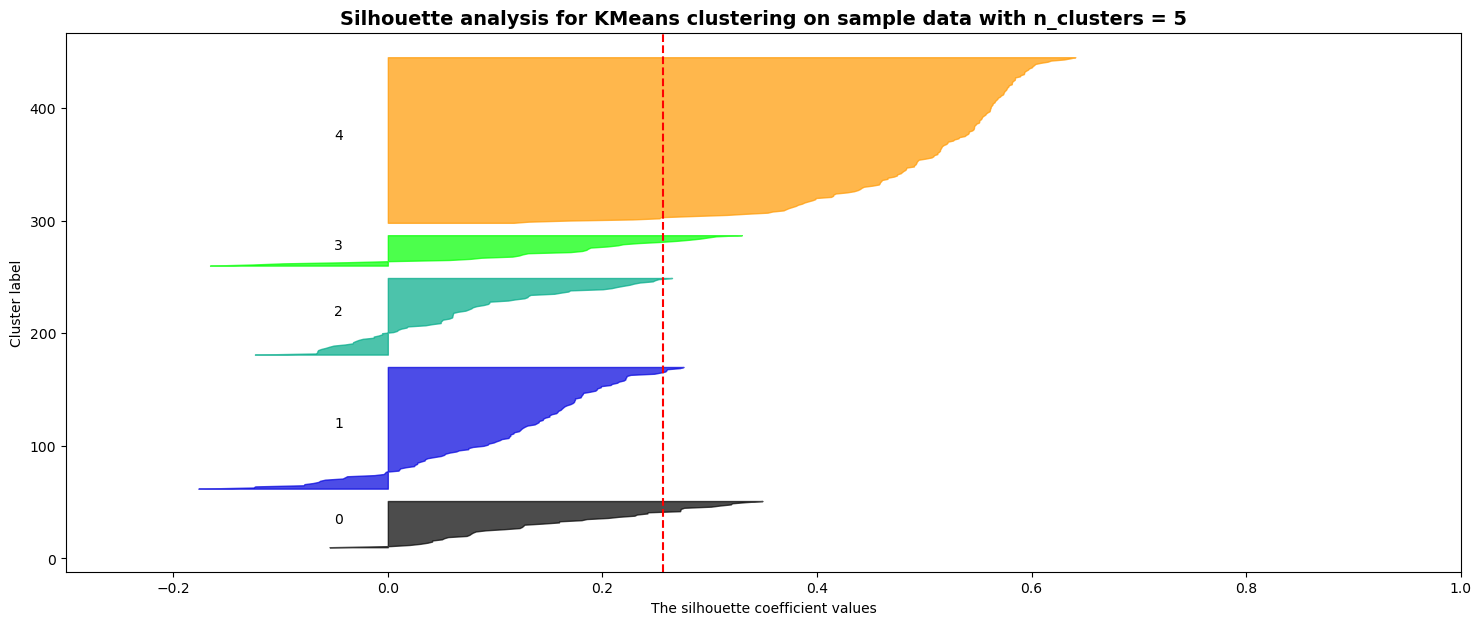

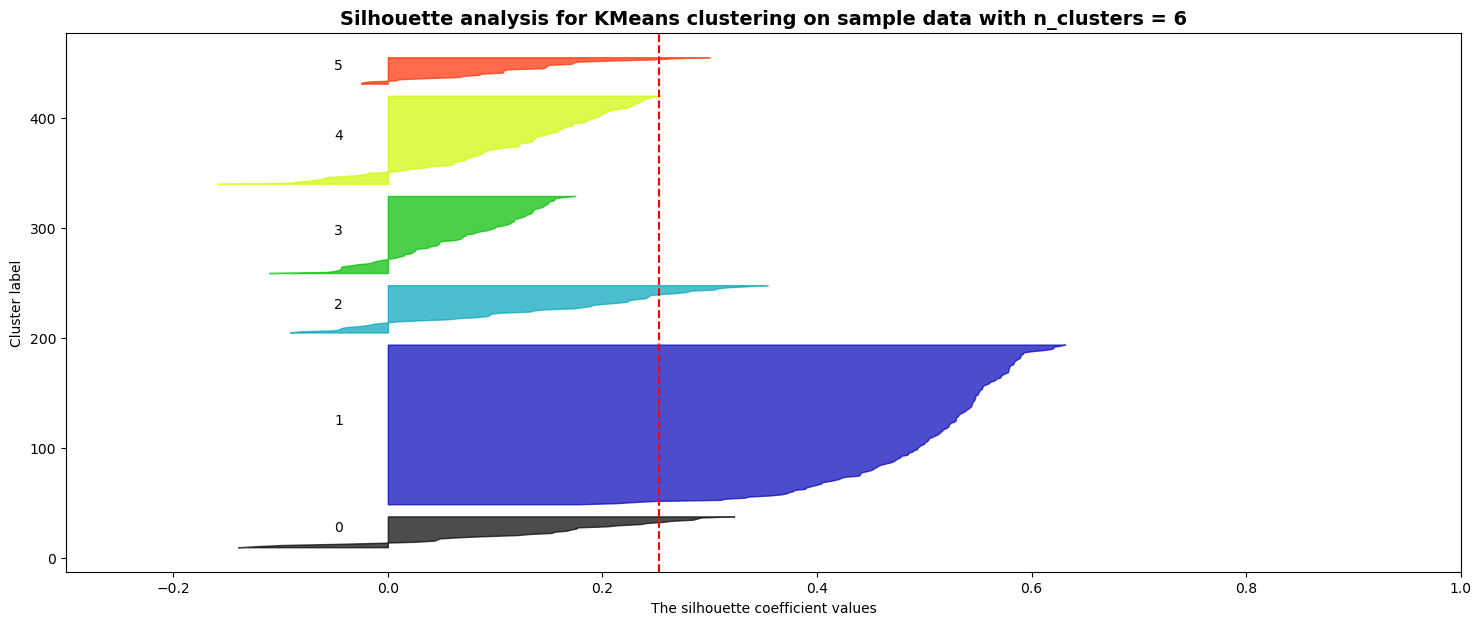

In [107]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, n_init=20, random_state=0)
    labels = km.fit_predict(X_new_dummy_dropped)
    
    silhouette_avg = silhouette_score(X_new_dummy_dropped, labels)
    sample_silhouette_values = silhouette_samples(X_new_dummy_dropped, labels)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.3, 1])

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            y=np.arange(y_lower, y_upper),
            x1=0,
            x2=ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [108]:
#use k=2
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
labels = kmeans.fit_predict(X_new_dummy_dropped)
labels

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
pca_X = PCA()
X = pd.DataFrame(X_new_dummy_dropped, X_new_dummy_dropped.index, X_new_dummy_dropped.columns)

In [110]:
pca_loading = pd.DataFrame(pca_X.fit(X).components_.T, index=X_new_dummy_dropped.columns, columns=[['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18']])
pca_loading

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
age,0.261241,0.218344,-0.424765,-0.684660,-0.374302,-0.238764,-0.061021,0.009330,-0.067708,-0.127620,0.050105,0.082612,-0.015468,-0.013794,-0.042135,-0.028319,0.026828,0.006410
bp,0.214613,-0.091757,-0.206883,-0.260335,0.886109,-0.076205,-0.171468,0.079200,0.021254,0.010319,0.028023,-0.005362,-0.051579,-0.053469,-0.002778,-0.014698,0.002619,-0.033968
sg,-0.375072,0.103305,0.139513,-0.369558,0.034544,0.586280,-0.421026,-0.379942,-0.113843,-0.051043,0.007402,0.004821,0.008994,0.046503,0.073903,-0.051441,-0.006081,0.006629
al,0.382805,-0.308930,0.328821,0.136994,-0.116325,-0.282231,-0.574079,-0.199846,-0.209340,-0.281198,-0.045940,0.025924,-0.091799,0.108562,-0.130965,-0.004432,0.060432,-0.041554
su,0.336586,0.502693,0.272946,0.050942,0.082777,0.203761,0.104208,0.220700,-0.630256,0.070730,0.134417,-0.018488,0.105177,-0.014013,-0.084017,0.059250,-0.079301,-0.014952
rbc,-0.242189,-0.083488,0.635226,-0.460118,-0.002531,-0.263110,-0.010031,0.436077,0.121093,0.199863,-0.038968,0.041539,-0.007261,0.029765,-0.015175,0.021601,0.012950,-0.000619
pc,-0.221408,0.101132,0.173803,-0.108177,0.174737,-0.459994,0.404295,-0.641567,-0.267173,-0.040197,-0.038891,-0.033571,0.015001,-0.026800,-0.024939,-0.066121,0.008020,-0.003504
pcc,0.063983,-0.024001,0.048786,-0.014666,-0.032323,-0.095751,-0.058020,0.027356,0.050648,-0.123181,0.182602,-0.372660,0.452058,-0.011908,0.541920,-0.291126,-0.234840,-0.387775
ba,0.037235,-0.030490,0.037658,-0.002166,0.008953,-0.062176,-0.050921,0.019431,-0.018065,-0.083232,0.154738,-0.215172,0.085685,-0.079063,0.262851,-0.074213,-0.065462,0.905191
bgr,0.364658,0.478982,0.327442,0.006690,0.057601,0.076648,0.058622,-0.226176,0.638559,-0.186723,-0.006146,0.103868,-0.080150,-0.067234,0.041256,0.011746,0.011938,0.013251


In [111]:
pc_scores = pd.DataFrame(pca_X.fit_transform(X), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
            'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18'], index=X.index)
pc_scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,-0.266634,0.104650,-0.894303,0.413408,0.381827,0.106756,-0.336792,-1.035210,-0.211616,0.303495,-0.757870,-0.339232,-0.075870,0.245479,0.054543,-0.229262,-0.133398,0.066244
1,-1.175820,-0.939767,1.153314,3.077331,-0.847116,0.022150,-1.164530,-1.301620,-0.849728,-0.843572,-0.242193,-0.134214,-0.109978,0.411884,-0.207221,0.035887,0.117605,-0.068809
2,2.815454,2.569848,2.121303,-0.221901,0.391721,-0.810849,0.680307,0.002020,0.884751,-0.038166,0.710450,0.446924,0.288077,0.370090,-0.784040,-0.303019,0.539745,0.056262
3,1.467085,-1.762949,0.900483,0.929684,-0.894771,-1.980308,-0.667710,0.675568,0.210935,0.436814,0.392816,0.531474,0.954104,-0.031871,0.040987,0.087182,-0.212562,-0.394086
4,-0.281934,-0.475490,0.247788,0.223665,0.246668,-1.801281,-0.022907,0.665191,-0.101067,-0.307216,-0.074001,0.120756,-0.196206,0.066988,-0.265062,0.078282,0.130412,-0.077810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.173556,0.240181,0.105440,-0.886174,0.382397,-0.237818,0.235403,0.158103,0.295495,-0.114523,0.034334,-0.081552,-0.071091,-0.219758,-0.140775,-0.018193,0.018326,-0.012268
396,-2.246446,-0.020419,0.386311,-0.425293,0.027669,0.338806,-0.115570,-0.020773,-0.314211,0.102357,-0.026930,-0.036799,0.043208,0.062694,0.085632,-0.031819,-0.000776,0.014211
397,-2.154040,-0.333137,0.937521,0.943531,1.324377,0.157507,0.181916,0.293565,0.131988,0.338782,-0.102924,-0.174083,0.019625,-0.033341,0.076002,0.050419,-0.028799,-0.022713
398,-2.492004,-0.208848,1.372810,0.672643,-0.073778,0.913037,0.267704,-0.240267,0.094806,0.158865,-0.110827,-0.250342,0.057935,-0.016989,0.049398,0.021941,-0.057136,0.025710


In [112]:
var=pc_scores.var()
var

pc1     3.136913
pc2     1.220414
pc3     0.940958
pc4     0.872936
pc5     0.719855
pc6     0.560733
pc7     0.454539
pc8     0.313938
pc9     0.273091
pc10    0.170473
pc11    0.131825
pc12    0.109952
pc13    0.103928
pc14    0.086948
pc15    0.079371
pc16    0.073756
pc17    0.056950
pc18    0.044484
dtype: float64

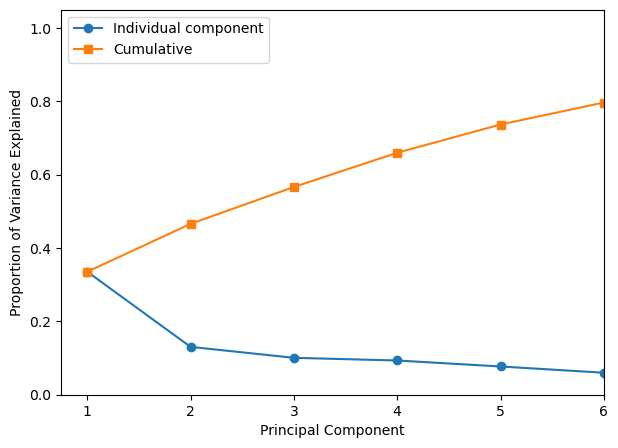

In [113]:
plt.figure(figsize=(7,5))

plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
, pca_X.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
, np.cumsum(pca_X.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6])
plt.legend(loc=2);

In [114]:
##choose 2

PCA_var=sum(pca_X.explained_variance_ratio_[0:2])
PCA_var

0.4659712729918205

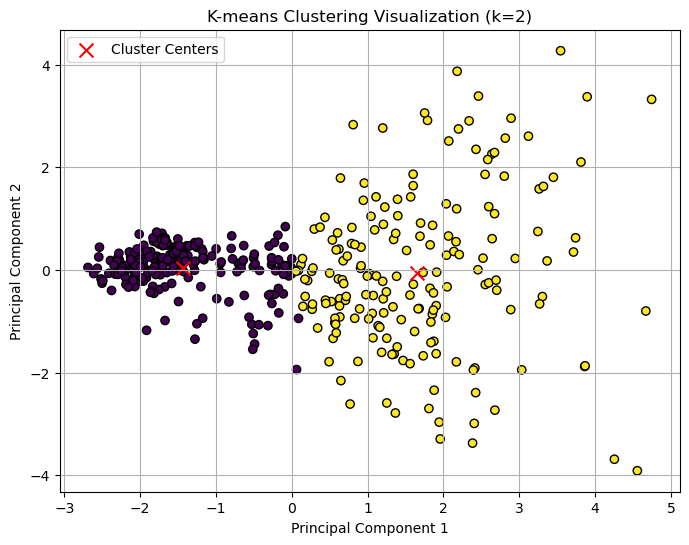

In [115]:
plt.figure(figsize=(8, 6))

principal_components = pca_X.fit_transform(X)
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0)
kmeans.fit(principal_components)
cluster_labels = kmeans.labels_

# Plot data points
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k')

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', s=100, label='Cluster Centers')

plt.title('K-means Clustering Visualization (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
y_1d = np.ravel(y_new)

adjusted_Rand_index = adjusted_rand_score(y_1d, cluster_labels)

adjusted_Rand_index


0.4703772721070761

- We choose to ue k=2, i.e. two sub-groups, because it has a better average silhouette score. 

8. Data Splitting:

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new_dummy_dropped, y_new, test_size=0.30, random_state=0, stratify=y_new)

9. The classifier used here is logistic regression since the predictor we have is catogorical with only 0 and 1 occurs, It's a natural choice for such tasks because it models the probability that a given input belongs to a particular class. 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

In [119]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices, dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import statsmodels.api as sm


In [120]:
logistic= LogisticRegression(max_iter=2000)

In [121]:
logistic.fit(X_train, y_train)

/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=2000)

In [122]:
pred_prob = logistic.predict_proba(X_test)
pred_prob

array([[1.99946545e-02, 9.80005345e-01],
       [9.99855793e-01, 1.44206948e-04],
       [9.96270637e-01, 3.72936262e-03],
       [9.95050690e-01, 4.94931023e-03],
       [9.92267311e-01, 7.73268922e-03],
       [8.76974595e-03, 9.91230254e-01],
       [9.99994874e-01, 5.12587848e-06],
       [9.99513945e-01, 4.86055442e-04],
       [9.94348624e-01, 5.65137555e-03],
       [9.98770065e-01, 1.22993511e-03],
       [9.80737022e-01, 1.92629783e-02],
       [9.94333991e-01, 5.66600943e-03],
       [4.12144797e-01, 5.87855203e-01],
       [2.28415022e-01, 7.71584978e-01],
       [2.01837620e-02, 9.79816238e-01],
       [9.99570245e-01, 4.29754516e-04],
       [1.37429750e-02, 9.86257025e-01],
       [9.99646164e-01, 3.53836413e-04],
       [8.21520533e-03, 9.91784795e-01],
       [9.99043846e-01, 9.56153647e-04],
       [9.97467722e-01, 2.53227808e-03],
       [9.94701371e-01, 5.29862926e-03],
       [8.43763661e-01, 1.56236339e-01],
       [2.31906788e-02, 9.76809321e-01],
       [9.999972

In [123]:
y_logist=np.ravel(y_test)
df = pd.DataFrame(data = {'prob': pred_prob[:,1], 'y_test': y_logist})

10. Performance Metrics

In [124]:
df['y_test_pred'] = df.prob.map(lambda x: 1 if x>0.5 else 0)

In [125]:
cm = confusion_matrix(df.y_test, df.y_test_pred)
print('Confusion Matrix : \n', cm)
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[72  2]
 [ 2 43]]
Accuracy :  0.9663865546218487


In [126]:
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity )
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9555555555555556
Specificity :  0.972972972972973


we use the sensitivity and specificity to examine the performance of the model, sensitivity states of all the actual positive cases, how many did the model correctly identify, and specifity states Of all the actual negative cases, how many did the model correctly identify.

In this case, we have both of these value is relatively high, so the model predict 1 well, which is s good model to choose.

11. feature selection using chaning threshhold, find the best threshold.

In [127]:
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel



# Select features based on non-zero coefficients from Lasso model
feature_selector = SelectFromModel(logistic, prefit=True)
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Get selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Print selected feature indices
print("Selected feature indices:", selected_feature_indices)


Selected feature indices: [ 2  3  5  9 12 13 16]


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [128]:
selected_feature_indices=[2, 3, 5, 9, 12, 13, 16]
selected_feature_names = X_train.columns[selected_feature_indices]
print("Selected feature names:", selected_feature_names)


Selected feature names: Index(['sg', 'al', 'rbc', 'bgr', 'htn', 'dm', 'pe'], dtype='object')


In [129]:
fpr, tpr, thresholds = roc_curve(df.y_test, df.prob)
ks_statistic = np.max(tpr - fpr)
ks_threshold = thresholds[np.argmax(tpr - fpr)]
ks_threshold

0.482771448068781

In [130]:
df['y_test_pred2'] = df.prob.map(lambda x: 1 if x>ks_threshold else 0)
cm1 = confusion_matrix(df.y_test, df.y_test_pred2)
sensitivity_log = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity_log )
specificity_log = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity_log)
acc_log = accuracy_score(df.y_test, df.y_test_pred2)
acc_log

Sensitivity :  0.9777777777777777
Specificity :  0.9594594594594594


0.9663865546218487

hence the accuracy has incease, since sensitivity increase little, which correctly identify more 1.

In [131]:
logistic.coef_

array([[ 0.15134758, -0.72220478,  1.39266695, -2.1794434 , -0.17536635,
         1.90791624, -0.49063808, -0.28623345, -0.24913584, -1.0606856 ,
        -0.34233395, -0.72952786, -1.06557624, -0.98789526, -0.04331981,
         0.75457121, -1.05807497, -0.72070879]])

In [132]:
X_new_1 = dmatrix(
'sg + al + rbc +bgr+htn+dm+pe',
data=X_new_dummy_dropped,
return_type='dataframe'
)

X_new_1

,Intercept,sg,al,rbc,bgr,htn,dm,pe
0,1.0,0.454071,-0.012548,-1.0,-0.341498,1.0,1.0,0.0
1,1.0,0.454071,2.208413,-1.0,-0.740638,0.0,0.0,0.0
2,1.0,-1.297699,0.727772,1.0,3.473064,0.0,1.0,0.0
3,1.0,-2.173584,2.208413,1.0,-0.392022,1.0,0.0,1.0
4,1.0,-1.297699,0.727772,1.0,-0.530963,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
395,1.0,0.454071,-0.752868,1.0,-0.101509,0.0,0.0,0.0
396,1.0,1.329955,-0.752868,1.0,-0.922524,0.0,0.0,0.0
397,1.0,0.454071,-0.752868,1.0,-0.606749,0.0,0.0,0.0
398,1.0,1.329955,-0.752868,1.0,-0.429915,0.0,0.0,0.0


In [133]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new_1, y_new, train_size=0.7, random_state=1, stratify=y_new)

model = sm.Logit(y_train_new, X_train_new).fit()

model.summary()

/Users/apple/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.032794
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  277
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                            7
Date:                Thu, 18 Apr 2024   Pseudo R-squ.:                  0.9506
Time:                        21:09:11   Log-Likelihood:                -9.0839
converged:                      False   LL-Null:                       -183.82
Covariance Type:            nonrobust   LLR p-value:                 1.602e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.9247      3.008     -2.302      0.021     -12.820      -1.030
sg             5.5989      2.657      2.108      0.035       0.392      10.806
al            -7.2713      2.377     -3.059      0.002     -11.930      -2.612
rbc            1.8657      0.786      2.374      0.018       0.326       3.406
bgr           -3.4110      2.595     -1.315      0.189      -8.497       1.675
htn          -26.4113   2.09e+06  -1.26e-05      1.000    -4.1e+06     4.1e+06
dm          -106.3805   5.74e+23  -1.85e-22      1.000   -1.12e+24    1.12e+24
pe           -22.5895   2.25e+04     -0.001      0.999   -4.42e+04    4.42e+04
==============================================================================

Possibly complete quasi-separation: A fraction 0.66 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

1. From the given chart, we see that only the "sg", "al" and "rbc" has p value less then 0.05, so they are the significent variable among the variables we choose, the other variables are having too large p value, become not significent.

2. From thses 3 vriables, "sg" has the larget positve coefficent, which means the most factor which would increase the rate of Chronic Kidney Disease is specific gravity, and  the more albumin will be, the less probabilty of having Chronic Kidney Disease.

Dicision Tree (9~11):

- There are a few reasons why we use Decision Tree. First, we realize that the predicted value follows binary distribution so we use Classification Tree to predict the discrete label. In addition, the Decision Tree can be used for handling mixed data types, which match the situation of our dataset.

In [134]:
decision_tree = DecisionTreeClassifier(
    max_depth = 30, 
    random_state=1)

In [135]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1)

[Text(0.5714285714285714, 0.9166666666666666, 'sg <= 0.366\ngini = 0.471\nsamples = 277\nvalue = [172, 105]\nclass = notckd'),
 Text(0.42857142857142855, 0.75, 'gini = 0.0\nsamples = 148\nvalue = [148, 0]\nclass = notckd'),
 Text(0.7142857142857143, 0.75, 'al <= -0.235\ngini = 0.303\nsamples = 129\nvalue = [24, 105]\nclass = ckd'),
 Text(0.5714285714285714, 0.5833333333333334, 'sc <= -0.318\ngini = 0.102\nsamples = 111\nvalue = [6, 105]\nclass = ckd'),
 Text(0.42857142857142855, 0.4166666666666667, 'rbc <= 0.0\ngini = 0.019\nsamples = 106\nvalue = [1, 105]\nclass = ckd'),
 Text(0.2857142857142857, 0.25, 'bp <= -0.107\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = ckd'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = ckd'),
 Text(0.42857142857142855, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = notckd'),
 Text(0.5714285714285714, 0.25, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]\nclass = ckd'),
 Text(0.7142

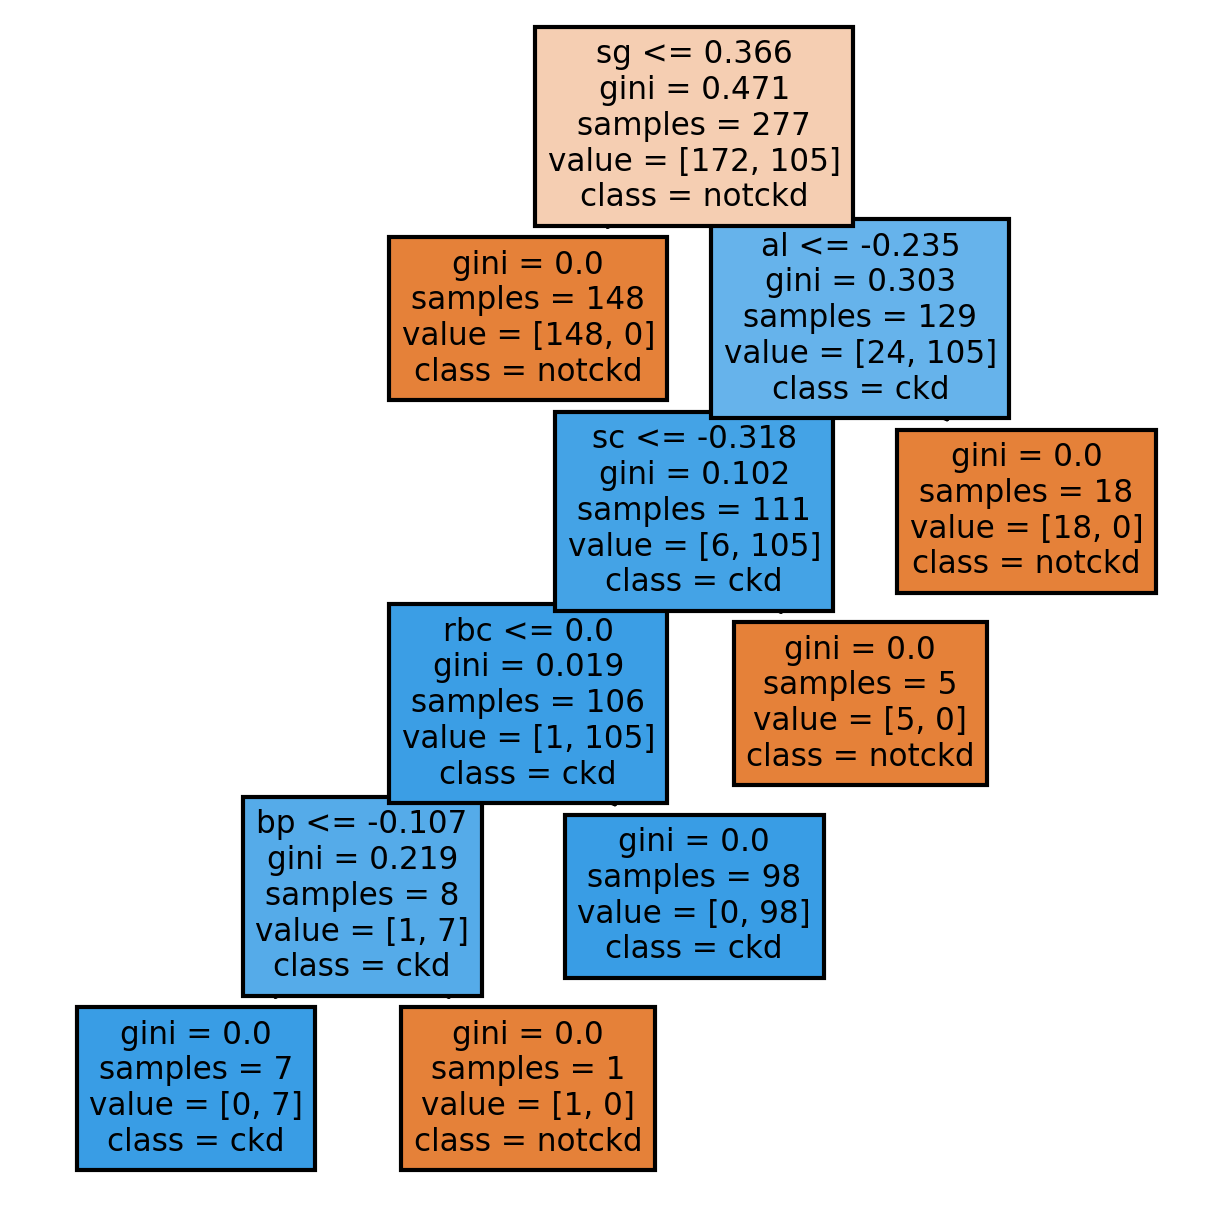

In [136]:
fig, axes = plt.subplots(
    nrows = 1,ncols = 1,figsize = (5,5), dpi=300
    )
plot_tree(
    decision_tree, 
    max_depth= 40, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd'],
    filled = True
)

In [137]:
pred = decision_tree.predict(X_test)

pred[:5]

array([1, 0, 0, 0, 0], dtype=int8)

In [138]:
con_matrix = confusion_matrix(y_test, pred)
cm = pd.DataFrame(con_matrix, index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,notckd,ckd
True,,
notckd,73,1
ckd,2,43


In [139]:
sensitivity = con_matrix[1,1]/(con_matrix[1,0]+con_matrix[1,1])
print('Sensitivity : ', sensitivity)

specificity = con_matrix[0,0]/(con_matrix[0,0]+con_matrix[0,1])
print('Specificity : ', specificity )

Sensitivity :  0.9555555555555556
Specificity :  0.9864864864864865


In [140]:
decision_tree.score(X_test, y_test)

0.9747899159663865

In [141]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        74
           1       0.98      0.96      0.97        45

    accuracy                           0.97       119
   macro avg       0.98      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



- From the output above, we can see that the precision of ckd is 0.97, which means 97% of the samples predicted as "ckd" are actually "ckd". And the precision of "notckd" is 0.98, which means 98% of the sampels predicted as "notckd" are correctly identified.

11. To get a better performance of decision tree

In [142]:
path = decision_tree.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [143]:
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

depth = [clf.tree_.max_depth for clf in clfs]
depth

[5, 3, 2, 1, 0]

In [144]:
test_score = [clf.score(X_test, y_test) for clf in clfs]

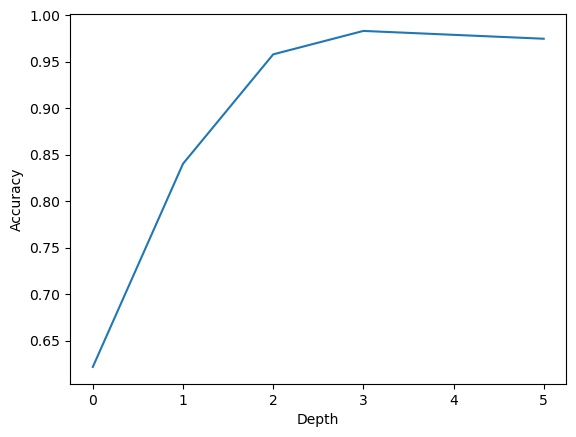

In [145]:
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [146]:
cs_dt_best = DecisionTreeClassifier(
    max_depth = 3, 
    random_state=1
    ) 

cs_dt_best.fit(X_new_dummy_dropped, y_new)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [147]:
pred = cs_dt_best.predict(X_test)
con_matrix2 = confusion_matrix(y_test, pred)
cmnew = pd.DataFrame(con_matrix2, index=['0', '1'], columns=['0', '1'])
cmnew.index.name = 'True'
cmnew.columns.name = 'Predicted'
cmnew

Predicted,0,1
True,,
0,73,1
1,0,45


In [148]:
sensitivity_tree = con_matrix2[1,1]/(con_matrix2[1,0]+con_matrix2[1,1])
print('Sensitivity : ', sensitivity_tree)

specificity_tree = con_matrix2[0,0]/(con_matrix2[0,0]+con_matrix2[0,1])
print('Specificity : ', specificity_tree )

Sensitivity :  1.0
Specificity :  0.9864864864864865


In [149]:
acc_tree = decision_tree.score(X_test, y_test)
acc_tree

0.9747899159663865

In [150]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99        45

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



- We use Pruning Tree to and the number of nods for each $\alpha$, and use accuracy to prue the tree. After that we test accuracy is maximum at depth 3 and fit it again. We can see there is an improvement on the precision, and Specificity&Sensitivity .  

12. Classifier Comparison:

In [151]:
data = {
    'specificity': [specificity_log, specificity_tree],
    'sensitivity': [sensitivity_log, sensitivity_tree],
    'accuracy': [acc_log, acc_tree]
}
sen_spe = pd.DataFrame(data, index=['logistic_reg', 'decision_tree'])
sen_spe

,specificity,sensitivity,accuracy
logistic_reg,0.959459,0.977778,0.966387
decision_tree,0.986486,1.000000,0.974790


- Comparaing the Specificity&Sensitivity and accuracy for two classifiers. We can see obviously that the Decision Tre has a better performance, so we choose the Decision Tree as our final model. 

13. Interpretable Classifier Insight: feature importance

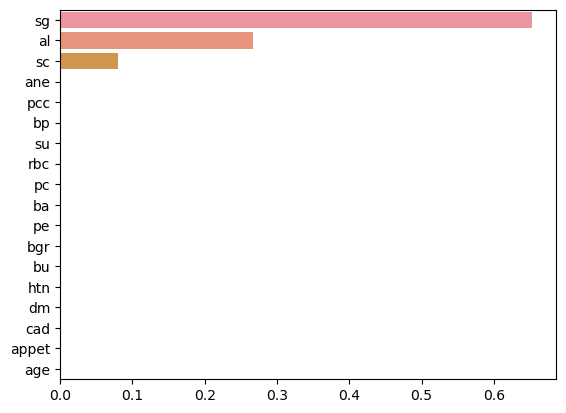

In [152]:
fea_imp = cs_dt_best.feature_importances_

sorted_indices = fea_imp.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

- We use the max_depth of **3** to fit the model. From the plot above, we can see that **sg** has the longest length, which indicates the most influence on the output of the model. For those features have very short bars represent low importance (they might be possible to exclude them from the mode). 

15. Team Contributions:

Junbo Tan: Q1, Q2, Q3, Q7-13 (Decision Tree)
Zichuan Xu: Q4, Q5, Q6, Q7 - 12 (Logistic Regression)

16. 

[GitHub Link]("https://github.com/Zichuan66/Assignment-6.git")